# <center>第9章 绘图和可视化</center>


## 9.1 matplotlib入门

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



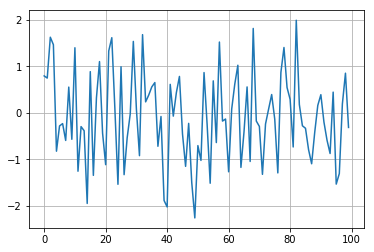

(array([15., 37., 34., 14.]),
 array([-2.25644373, -1.1957081 , -0.13497246,  0.92576317,  1.9864988 ]),
 <a list of 4 Patch objects>)

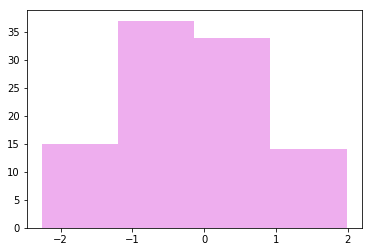

In [2]:
data=np.random.randn(100)

plt.plot(data)#折线图
plt.grid(b=True,which='both')#显示网格
plt.show()
#注意plt.show显示一次之后就会把之前的内容都抹掉
plt.hist(data,bins=4,color='#EEAEEE')#直方图

### 9.1.1 创建Figure来画图

#### 1.plt.figure(figsize).add_subplot

(array([102., 122., 112.,  80., 109., 108.,  82., 101., 102.,  82.]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

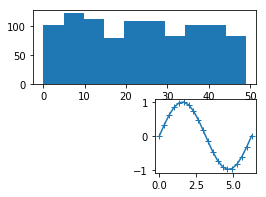

In [7]:
fig=plt.figure(figsize=(4,3))
ax1=fig.add_subplot(2,2,4)
x=np.linspace(0,2*np.pi,20)
y=np.sin(x)
ax1.plot(x,y,marker='+')

ax2=fig.add_subplot(2,1,1)
ax2.hist(np.random.randint(0,50,1000),bins=10)
plt.show()

#### 2.更简单的创建figure的方法

>plt.subplots(nrow,ncol,figsize,dip)

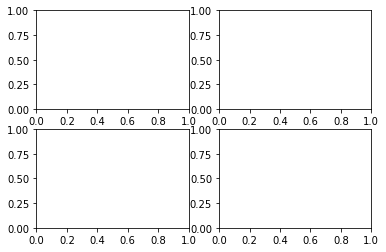

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B65C8CEBE0>,
      dtype=object)

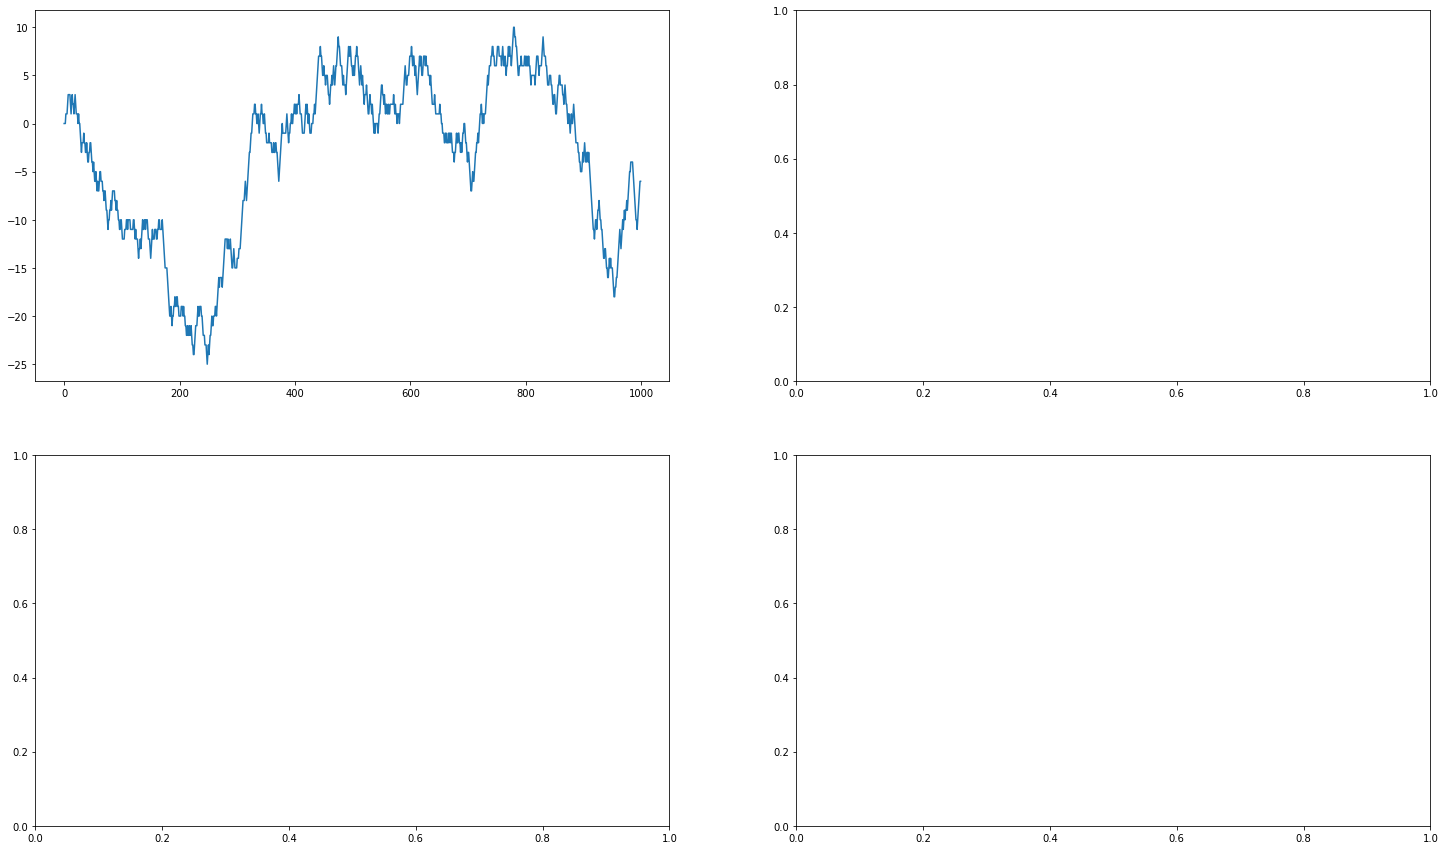

In [16]:
#fig.subplots_adjust(wspace=0,hspace=0.1)
fig,axes=plt.subplots(2,2)
fig
fig.set_size_inches(w=25,h=15)
#可以看到axes是一个2x2的数组
axes
axes[0,0].plot(np.random.randint(-1,2,1000).cumsum())
plt.show()

**subplots的参数列表:**

| 参数 | 说明 |
| :-: | :-: |
| nrows | 行数 |
| ncols | 列数 |
| sharex | 共享x轴刻度 |
| sharey | 共享y轴刻度 |

调整subplot周围的间距(默认情况下，matplotlib会在subplot外围和subplot之间留下一定的间距)

>subplot_adjust(left,bottom,right,top,wspace,hspace)

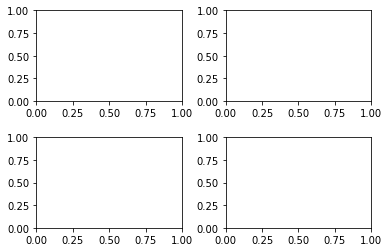

In [11]:
x,y=plt.subplots(2,2)
x.subplots_adjust(wspace=0.3,hspace=0.4)

#### 3.添加子图(就是在图里画另一个图)

>plt.figure().add_axes(rect=[left,bottom,width,height]),这是以左上角为原点的

Text(0.5,1,'figure1')

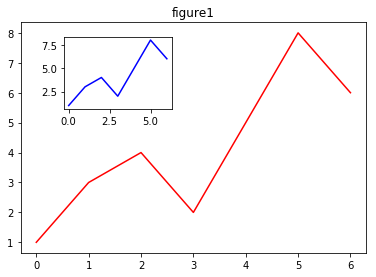

In [12]:
fig=plt.figure()
x=range(0,7)
y=[1,3,4,2,5,8,6]

ax1=fig.add_axes([0.1,0.1,0.8,0.8])#从figure10%的位置开始绘制，宽高是figure的80%
ax1.plot(x,y,'r')
ax1.set_title('figure1')

#新增figure2，嵌套在figure1里面
ax2=fig.add_axes([0.2,0.6,0.25,0.25])#分别是left,bottom,width,height
ax2.plot(x,y,'b')
plt.show()

### 9.1.2 颜色、标记和线型(color,marker,linestyle)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

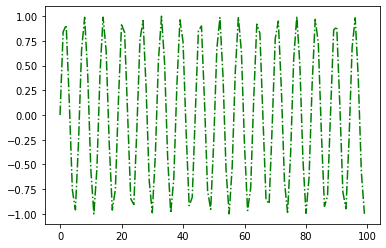

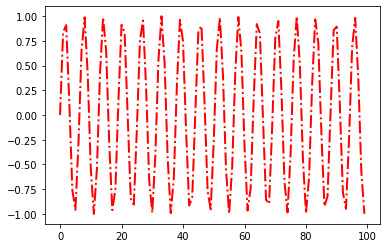

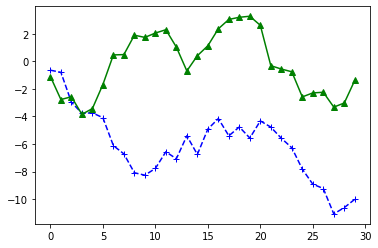

In [9]:
x=np.arange(100)
y=np.sin(x)
plt.plot(x,y,'g-.')
plt.show()
plt.plot(x,y,linestyle='-.',color='r',linewidth=2)
plt.show()

#注意位置参数必须放在关键字参数之前
plt.plot(np.random.randn(30).cumsum(),'b+--',np.random.randn(30).cumsum(),'g^-',label=['hello','world'])
plt.show()

<font color='#FF0000'>**APPENDIX：**</font>

1. [marker的参考网站](https://matplotlib.org/api/markers_api.html?highlight=marker#module-matplotlib.markers)

2. [linestyle的参考网站](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle)

3. [RGB颜色表](https://www.114la.com/other/rgb.htm)

4. [常用marker表](https://raw.githubusercontent.com/anyeguiyuzhe/my_python_notebook/master/marker_chart.jpg)

### 9.1.3 刻度、标签和图例

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.刻度

plt.xlim(min,max)

plt.xticks(list,list)

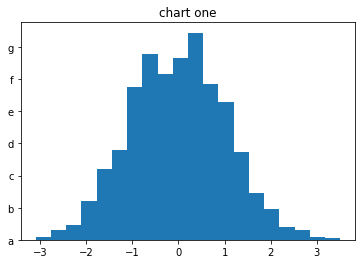

([<matplotlib.axis.XTick at 0x11c12028688>,
 <a list of 11 Text xticklabel objects>)

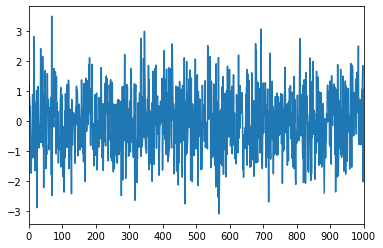

In [4]:
a=np.random.randn(1000)
plt.hist(a,bins=20)
plt.title('chart one')
plt.yticks(np.linspace(0,120,7),['a','b','c','d','e','f','g'])
plt.show()

#设置刻度(标签可以用文字代替)
plt.plot(a)
plt.xlim([0,1000])
plt.xticks(np.linspace(0,1000,11))

**将刻度用文字替换**

[Text(0,0,'one'), Text(0,0,'two'), Text(0,0,'three'), Text(0,0,'four')]

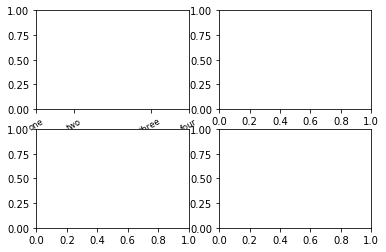

In [14]:
a,b=plt.subplots(2,2)
b[0,0].set_xticks([0,250,750,1000])
b[0,0].set_xticklabels(['one','two','three','four','five',],rotation=30,fontsize='small')

#### 2.标题和图例

[Text(0,0,'one'),
 Text(0,0,'two'),
 Text(0,0,'three'),
 Text(0,0,'four'),
 Text(0,0,'five')]

Text(0.5,0,'stages')

Text(0.5,1,'Java')

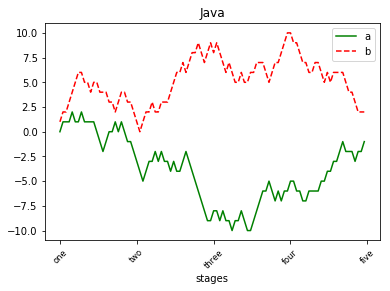

In [12]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randint(-1,2,100).cumsum(),'g-',np.random.randint(-1,2,100).cumsum(),'r--')
#改变X轴刻度
ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels(['one','two','three','four','five'],rotation=45,fontsize='small')
ax.set_xlabel('xlabel')
ax.set_title('Java')
ax.legend(['a','b'],loc='best')
plt.show()

**loc的取值表：**

|含义|字符串值|数值|
|:-:|:-:|:-:|
|最合适位置|best|0|
|右上角|upper right|1|
|左下角|lower left|3|
|中间|center|10|

### 9.1.4 移动坐标轴到中心位置

(-2, 2)

(-3, 4)

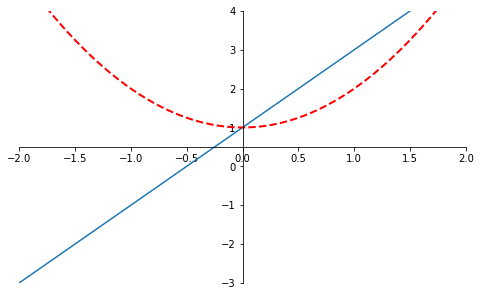

In [18]:
x=np.linspace(-2,2,250)
y1=2*x+1
y2=x**2+1

plt.figure(figsize=(8,5))
plt.plot(x,y1,label='First Line')
plt.plot(x,y2,color='red',linewidth=2.0,linestyle='--',label='Second Line')
plt.xlim((-2,2))
plt.ylim((-3,4))

ax=plt.gca()#获得当前的aexs
ax.spines['right'].set_color('none')#隐藏右边
ax.spines['top'].set_color('none')#隐藏上边
ax.xaxis.set_ticks_position('bottom')#将下边设为x轴
ax.yaxis.set_ticks_position('left')#将左边设为y轴
ax.spines['bottom'].set_position(('axes',0.5))#将x轴移动到axes0.5的位置
ax.spines['left'].set_position(('axes',0.5))#将y轴移动到axes0.5的位置

- 坐标轴反转

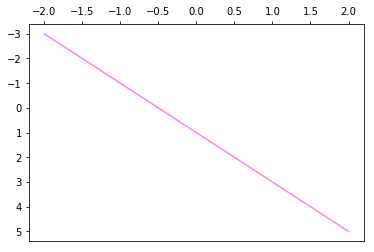

In [19]:
plt.plot(x,y1,color='#FF83FA')
ax=plt.gca()
ax.xaxis.set_ticks_position('top')#将x轴自动到坐标轴上面
ax.invert_yaxis()#反转y轴

### 9.1.5 注解以及在subplot上绘图

>text(x, y, s, fontdict=None,**kwargs)

>annotate(s, xy, *args, **kwargs)

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import tushare as ts
pro=ts.pro_api()

      ts_code trade_date   open   high    low  close  pre_close  change  \
0   000001.SZ   20200220  15.27  15.62  15.10  15.59      15.24    0.35   
1   000001.SZ   20200219  15.10  15.37  15.08  15.24      15.20    0.04   
2   000001.SZ   20200218  15.33  15.33  15.01  15.20      15.37   -0.17   
3   000001.SZ   20200217  15.04  15.37  14.93  15.37      15.03    0.34   
4   000001.SZ   20200214  14.75  15.14  14.70  15.03      14.65    0.38   
5   000001.SZ   20200213  14.71  14.88  14.61  14.65      14.77   -0.12   
6   000001.SZ   20200212  14.79  14.82  14.60  14.77      14.79   -0.02   
7   000001.SZ   20200211  14.60  14.94  14.56  14.79      14.50    0.29   
8   000001.SZ   20200210  14.51  14.53  14.30  14.50      14.62   -0.12   
9   000001.SZ   20200207  14.60  14.69  14.41  14.62      14.77   -0.15   
10  000001.SZ   20200206  14.81  14.87  14.51  14.77      14.63    0.14   
11  000001.SZ   20200205  14.59  14.89  14.32  14.63      14.60    0.03   
12  000001.SZ   20200204 

Text(5,15,'Hello Python')

Text(10,4,'annotate')

<module 'matplotlib.pyplot' from 'D:\\Anacoda\\lib\\site-packages\\matplotlib\\pyplot.py'>

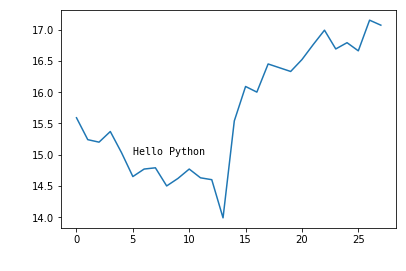

In [9]:
start='20200105'
end='20200220'
info=pro.daily(ts_code='000001.SZ',start_date=start,end_date=end)
print(info.head(10))
print('\nshape:',info.shape)
plt.plot(info['close'],linestyle='-')
#写注释
plt.text(5,15,'Hello Python',family='monospace',fontsize=10)
plt.annotate('annotate',(10,3),(10,4),arrowprops=dict(facecolor='#EFEEEE',headwidth=4,width=3,headlength=4),horizontalalignment='left',verticalalignment='bottom')
plt

### 9.1.6 绘制图形

>要在图表中添加一个图形，你需要创建一个块对象，然后通过ax.add_patch(shp)添加

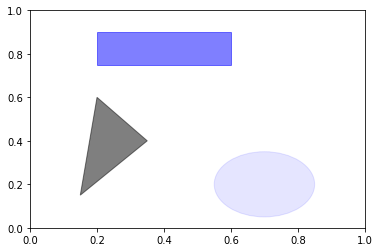

In [13]:
x,y=plt.subplots(1)
ax=y
#矩形
rec=plt.Rectangle((0.2,0.75),0.4,0.15,color='b',alpha=0.5)#参数分别是矩形左下角图表以及长宽
cir=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.1)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='k',alpha=0.5)
ax.add_patch(rec)
ax.add_patch(cir)
ax.add_patch(pgon)
plt.show()

## 9.2 使用pandas绘图

### 9.2.1 折线图

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

#### 1.series的plot方法

>pd.Series().plot(label,ax,alpha,kind,logy,use_index,rot,xticks,yticks,grid)，label是用于图例的标签，rot表示刻度旋转值

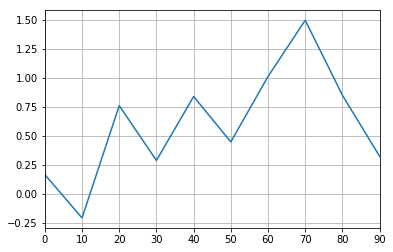

In [18]:
#Series的plot方法
s=pd.Series(np.random.randn(10).cumsum(),index=np.arange(0,100,10))
#Series的索引会被传给matplotlib，用以绘制X轴
s.plot(grid=True,kind='line')
plt.show()

#### 2.DataFrame的plot方法

>pd.DataFrame.plot(subplots,sharex,sharey,figsize,title,legend(bool),sort_columns)，subplots表示将DataFrame的列绘制到单独的subplot中

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3DFC660F0>,
      dtype=object)

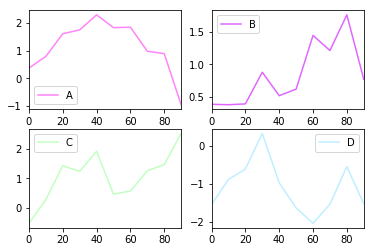

In [19]:
x,y=plt.subplots(2,2)
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=list('ABCD'),index=np.arange(0,100,10))
df.plot(ax=y,subplots=True,color=['#FF83FA','#E066FF','#C1FFC1','#BFEFFF'],label=['f','s','aa','vv'])
plt.legend()
plt.show()

#### 3.为折线图填充阴影-fill_between(x,y1,y2,color)

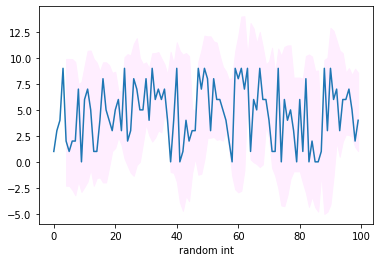

In [5]:
y=pd.Series(np.random.randint(0,10,100))
std=y.rolling(5).std()
mean=y.rolling(5).mean()
plt.plot(range(100),y)
plt.xlabel('random int')
plt.fill_between(range(100),mean-1.96*std,mean+1.96*std,color='#FFEEFF')
plt.show()

#### 4.需要绘制2个y轴的情况

,total_bill,tip_pct
0,16.99,0.059447
1,10.34,0.160542
2,21.01,0.166587
3,23.68,0.139780
4,24.59,0.146808


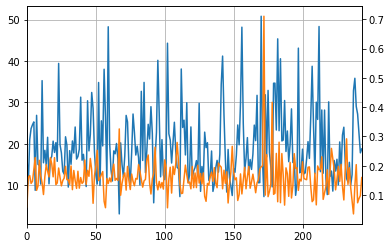

In [2]:
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path)[['total_bill','tip_pct']]
data.head()
data['total_bill'].plot(grid=True)
data['tip_pct'].plot(secondary_y=True,grid=True)

### 9.2.2 柱状图

#### 1.Series的柱状图

>plt.bar(left,height,width,bottom,color,edgecolor))#edgecolor是柱子的线条颜色


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

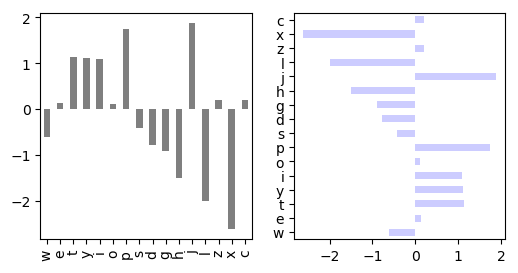

GENUS,A,B,C,D
one,0.366631,0.374248,0.844444,0.888996
two,0.264978,0.630313,0.637521,0.191924
three,0.419986,0.862348,0.539593,0.712236
four,0.986545,0.492301,0.213104,0.239983
five,0.212627,0.009754,0.300874,0.730312
six,0.995646,0.202517,0.527517,0.786446


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002B65F32CCC0>,
      dtype=object)

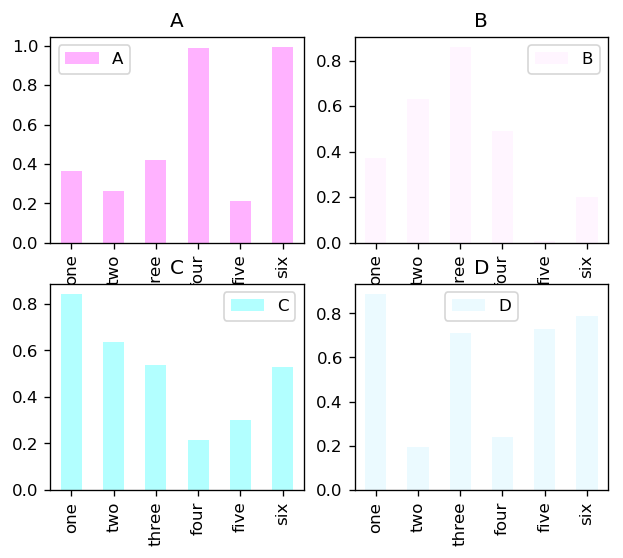

In [37]:
fig,axes=plt.subplots(1,2,figsize=(6,3),dpi=100)
data=pd.Series(np.random.randn(16),index=list('wetyiopsdghjlzxc'))
data.plot.bar(ax=axes[0],color='k',alpha=0.5)
data.plot.barh(ax=axes[1],color='b',alpha=0.2)
plt.show()

fig,axes=plt.subplots(2,2,figsize=(6,5),dpi=120)
df=pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],
                columns=pd.Index(['A','B','C','D'],name='GENUS'))
df
#如果每列要画在不同的图形中，传入subplots=True
df.plot.bar(ax=axes,subplots=True,alpha=0.3,color=['#FF00FF','#FFE1FF','#00FFFF','#BFEFFF'])
plt.legend(loc='best')

#### 2.DataFrame的柱状图

>pd.DataFrame.plot.bar(stacked=True,ax,subplots=True,stacked)

,a,b,c,d
java,0.703009,1.225511,-0.405399,0.193169
python,2.467817,0.041678,1.754878,0.259812
julia,-1.019394,-0.062593,-0.024435,-0.393333
perl,1.137886,0.345424,-1.124754,-1.528651
c++,-0.128241,1.502807,-2.285833,1.771797


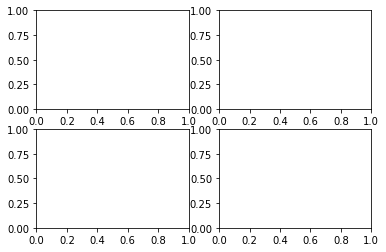

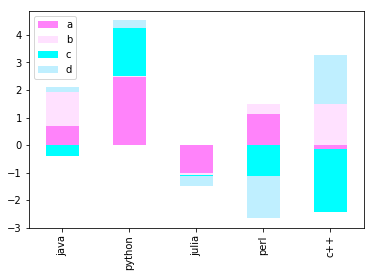

In [45]:
a,b=plt.subplots(2,2)
data=pd.DataFrame(np.random.randn(5,4),index=['java','python','julia','perl','c++'],columns=['a','b','c','d'])
data
data.plot(kind='bar',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'],stacked=True)

#### 3.堆积柱状图

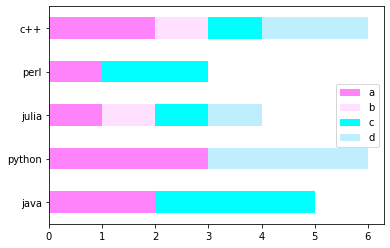

In [46]:
data=pd.DataFrame(np.random.randint(0,4,(5,4)),index=['java','python','julia','perl','c++'],columns=['a','b','c','d'])
data.plot(kind='barh',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'],stacked=True)

#### 4.龙卷风图(tornado)

([<matplotlib.axis.XTick at 0x197aa9496d8>,
 <a list of 2 Text xticklabel objects>)

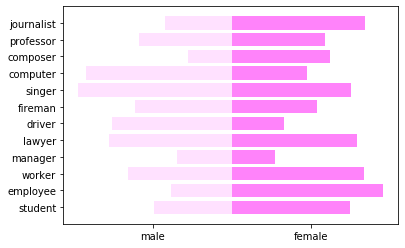

In [25]:
occupation=['student','employee','worker','manager','lawyer','driver','fireman','singer','computer','composer','professor','journalist']
count_f=np.random.randint(50,200,12)
count_m=np.random.randint(-200,-50,12)
plt.barh(np.arange(12),count_f,color='#FF83FA',label='female')
plt.barh(np.arange(12),count_m,color='#FFE1FF',label='male')
plt.yticks(np.arange(12),occupation)
plt.xticks([-100,100],['male','female'])

- 展示每天各种聚会规模所占的比例

size,1,2,3,4,5,6
day,,,,,,
Fri,1.0,16.0,1.0,1.0,NaN,NaN
Sat,2.0,53.0,18.0,13.0,1.0,NaN
Sun,NaN,39.0,15.0,18.0,3.0,1.0
Thur,1.0,48.0,4.0,5.0,1.0,3.0


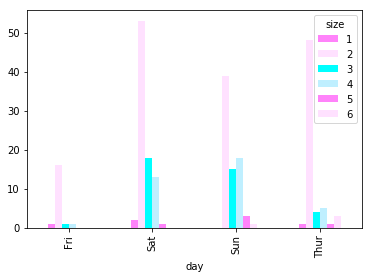

In [47]:
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path,index_col=None)
size=data.pivot_table(values='tip',index='day',columns='size',aggfunc='count')
size
size.plot(kind='bar',color=['#FF83FA','#FFE1FF','#00FFFF','#BFEFFF'])

### 9.2.3 直方图和密度图

#### 1.直方图

plt.hist(x,bins,orientation='horizontal'(水平直方图选项),color,edgecolor,cumulative,histtype)#histtype分别取bar/barstacked/step/stepfilled表示直方图、堆栈图、无填充的线图和有填充的线图

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

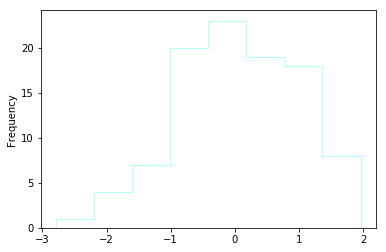

In [52]:
#直方图和密度图
x=pd.Series(np.random.randn(100))
#或者是这样 x.plot.hist(bins=5)
x.plot(kind='hist',bins=8,color='#8A2BE2',alpha=0.3,edgecolor='#00FFFF',histtype='step')

#### 2.堆叠的直方图

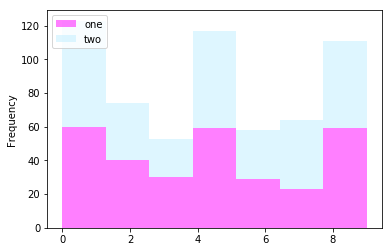

In [21]:
df=pd.DataFrame(np.random.randint(0,10,(300,2)),columns=['one','two'])
df.plot(kind='hist',alpha=0.5,bins=7,stacked=True,color=['#FF00FF','#BFEFFF'])
plt.legend(loc='upper left')

#### 3.按照某一指标分类画可比直方图(plot的by参数)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000197A9E10240>,
      dtype=object)

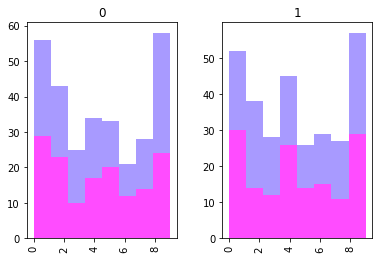

In [20]:
df=pd.DataFrame(np.random.randint(0,10,(300,2)),columns=['one','two'])
df['by']=np.random.randint(0,2,300)
df[['one','two']].hist(color=['#FF00FF','#8470FF'],by=df['by'],bins=8,stacked=True,alpha=0.7)

#### 4.密度图

>通过计算可能会产生观测数据的连续概率分布的估计而产生的

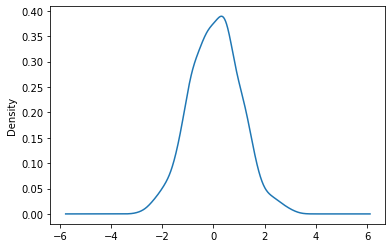

In [61]:
pd.Series(np.random.randn(1000)).plot(kind='density')

#### 5.seaborn画直方图和密度图

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


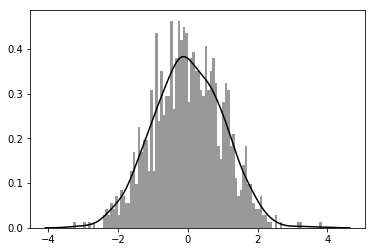

In [8]:
import seaborn as sns

a=np.random.randn(1000)
sns.distplot(a,bins=100,color='k')

- 散点图

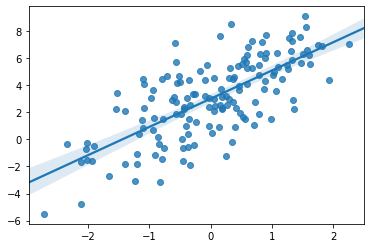

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x=np.random.randn(150)
y=x*2+3+np.random.randn(150)/0.5
sns.regplot(x,y)

- 分面网格图(facet grid)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


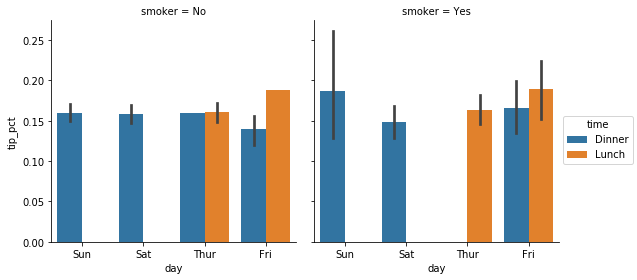

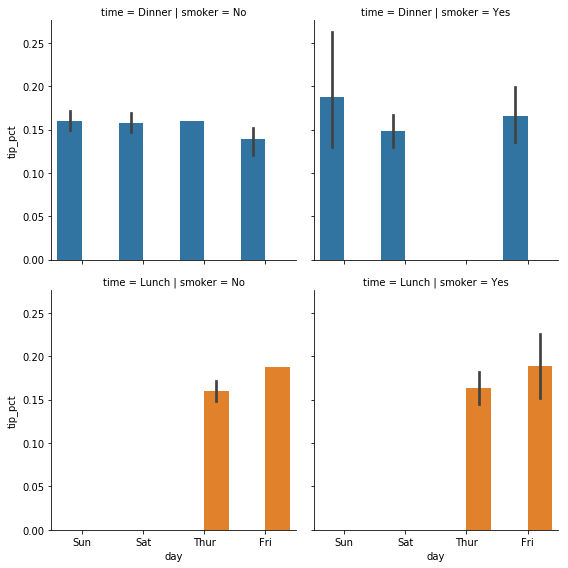

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#数据集有额外分组维度
path=r"D:\文档\Python Scripts\data_test\tips.csv"
data=pd.read_csv(path)
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',kind='bar',data=data)
plt.show()
sns.factorplot(x='day',y='tip_pct',hue='time',col='smoker',row='time',kind='bar',data=data)



- 箱线图，显示中位数，四分位数，异常值

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


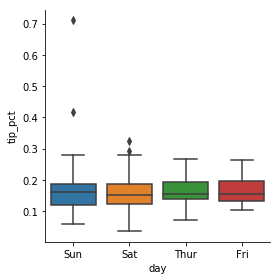

In [12]:
data
sns.factorplot(x='day',y='tip_pct',kind='box',data=data)

### 4.面积图

auth success  ( 聚宽第二届高频因子挑战赛正式启动，欢迎来战。详情查看大赛官方网页：http://suo.im/4SbA8A )


([<matplotlib.axis.YTick at 0x252a1053668>,
 <a list of 8 Text yticklabel objects>)

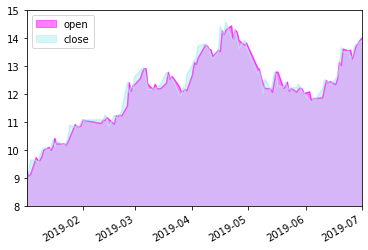

In [5]:
import jqdatasdk as jq
from datetime import datetime 

jq.auth('17750593771','17750593771mwy')
jq.get_query_count()
start=datetime(2019,1,1)
end=datetime(2019,7,1)
data=jq.get_price('000001.XSHE',start,end,frequency='daily')
data.head()
data[['open','close']].plot.area(stacked=False,color=['#FF00FF','#AEEEEE'])
plt.ylim([8,15])
plt.yticks(np.linspace(8,15,8))

### 5.饼图

>plt.pie(x,explode偏移量,labels，colors,shadow=False)

([<matplotlib.patches.Wedge at 0x252a122b470>,
 [Text(0.2447730130080499, 1.0724207066739067, 'a'),
  Text(-1.1999999999999986, -5.617605406142127e-08, 'b'),
  Text(0.24477311341532126, -1.0724206837565986, 'c')],
 [Text(0.1335125525498454, 0.5849567490948581, '42.86%'),
  Text(-0.6999999999999992, -3.27693648691624e-08, '14.29%'),
  Text(0.13351260731744793, -0.5849567365945083, '42.86%')])

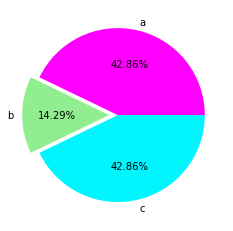

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s=pd.Series(np.random.randint(1,9,3),index=list('abc'))
explode=[0,0.1,0]
color=('#FF00FF','#90EE90','#00F5FF')
plt.pie(s,labels=s.index,shadow=False,explode=explode,colors=color,autopct='%1.2f%%')

### 6.词云

In [ ]:
import jieba
from wordcloud import WordCloud
import pandas as pd
import pandas as pd
import numpy as np

<class 'wordcloud.wordcloud.WordCloud'>


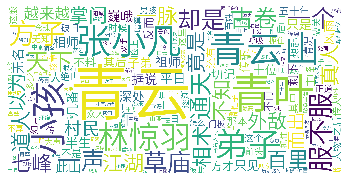

In [18]:
path=r"D:\文档\Python Scripts\Python数据分析基础（第2版）数据\ch5\zhuxian.txt"
#这里用'utf-8'开头会出现\ufeff
with open(path,'r',encoding='utf-8-sig') as f:
    data=f.read()
word_list=' '.join(jieba.cut(data))
cloud=WordCloud(font_path=r"D:\文档\Python Scripts\siyuanheiti.ttf",background_color='white',width=2000,height=1000,max_words=200).generate(word_list)
print(type(cloud))
plt.imshow(cloud)
plt.axis('off')
plt.show()

以图片为模板

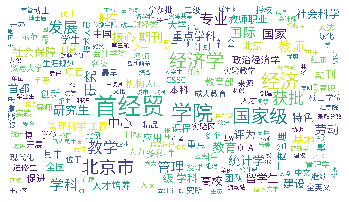

In [29]:
from imageio import imread
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

path=r"D:\文档\Python Scripts\Python数据分析基础（第2版）数据\ch5\cuebintro.txt"
img_path=r"D:\图片\壁纸\20180829005510.jpg"

#这里用'utf-8'开头会出现\ufeff
with open(path,'r',encoding='utf-8-sig') as f:
    data=f.read()
word_list=' '.join(jieba.cut(data))
coloring=imread(img_path)
stw=STOPWORDS.copy()
stw.add(u'人')
stw.add(u'的')
stw.add(u'等')
cloud=WordCloud(font_path=r"D:\文档\Python Scripts\siyuanheiti.ttf",background_color='white',width=2000,\
                height=1000,max_words=200,max_font_size=180,scale=2,mask=coloring,stopwords=stw).generate(word_list)
ImageColorGenerator(coloring)
plt.imshow(cloud)
plt.axis('off')
plt.show()

## 9.3 seaborn绘图

### 1.直方图和密度图

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#定义主题风格，darkgrid,whitegrid,dark,white,ticks
sns.set(style='darkgrid')

In [5]:
tips=pd.read_csv(r"D:\文档\Python Scripts\data_test\tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [9]:
sns.regplot(x='total_bill',y='tip',hue='smoker',stype='time',data=tips)

TypeError: regplot() got an unexpected keyword argument 'hue'

In [8]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxplot',
 'categorical',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'pointplot',
 'rcmod',
 'regplot',
 'regression',
 'reset_defaults'